In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
# import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from ipykernel.pylab.backend_inline import flush_figures

from scipy.integrate import quad, dblquad, tplquad

%matplotlib inline

plt.rcParams.update({
    "figure.figsize": (6,6),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


### Example

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.


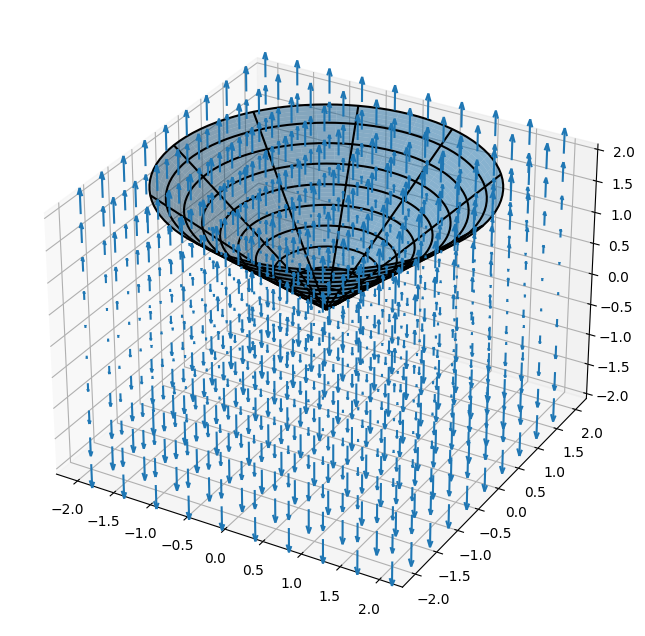

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


#### Solution

Parametrize the cone.

$$ \vec r(u,v) =  u \cos v\,\vec i +  u \sin v\,\vec j +  u\,\vec k$$

$$ 0 \leq u \leq 1$$
$$ 0 \leq v \leq 2\pi$$

$$\vec r_u\times r_v = -u\cos v \,\vec i - u \sin v  \,\vec j + u \,\vec k $$

$$\vec F(\vec r(u,v)) = u\,\vec k $$

$$\text{Flux} = \int_0^{2\pi} \int_0^2 u^2\,du\,dv = \frac{16\pi}{3}$$

## Examples

Compute the flux of the radial vector field $x\,\vec i + y\,\vec j + z\,\vec k$ through the outward-oriented unit sphere. 
  
  

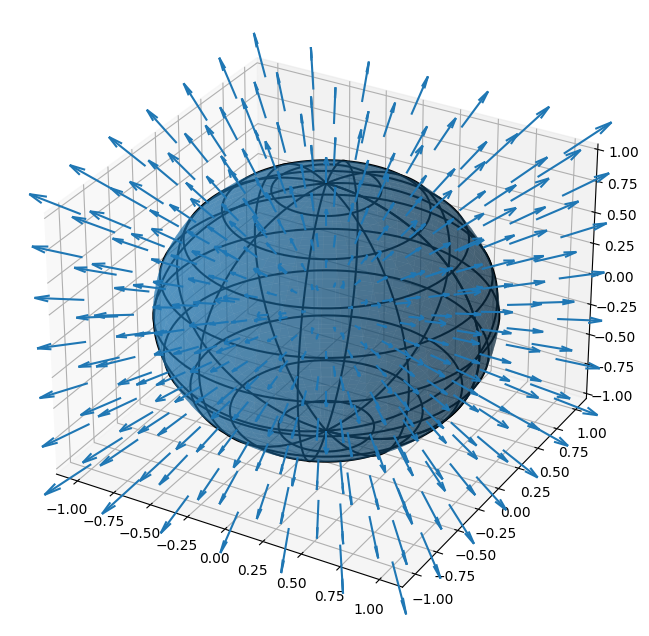

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,pi,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-1,1,7)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,U,V,W,length=.2);


#### Solution

$$ \iiint_E 3 dV = 3\frac{4\pi}{3} = 4\pi$$

### Revisit Cone

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.
  
  

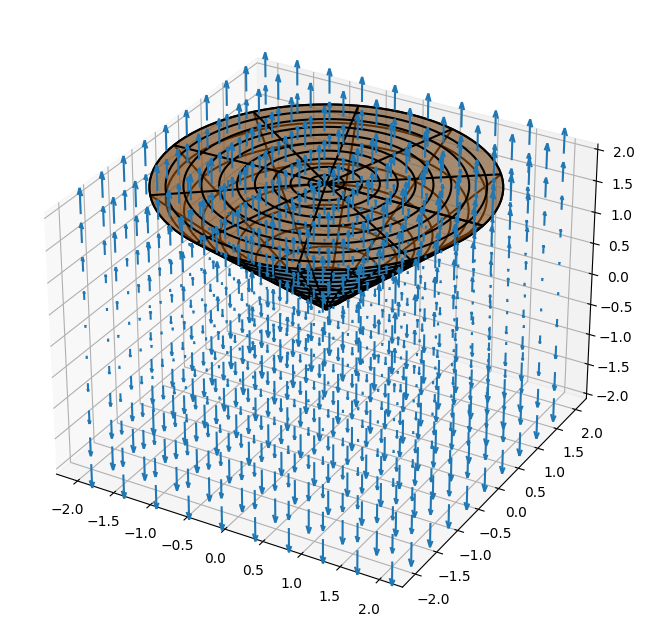

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


#### Solution

Call the surface of the cone oriented up $S_1$ and then consider the disk $x^2 + y^2 \leq 4, z = 2$ oriented up as $S_2$. Together, they bound a solid region. 

The flux of the field out the top (up) minus the vector field **up** though the cone (what we're trying to compute) is the triple integral of the divergence in between, which is 1, so we get 

$$\iint_{S_2} z\,\vec k \cdot d\vec S - \iint_{S_1} z\,\vec k \cdot d\vec S = \iiint_E dV = \frac{8\pi}{3} $$ with the RHS the volume of a cone. Further, $z\,\vec k$ is constant $\2\vec k$ on $S_2$ so the first term on the left is $8\pi$ (2 times the area). Solving algebraically, we see 

$$\iint_{S_1} z\,\vec k\cdot d\vec S = \frac{16\pi}{3}$$ as before.

### Fishing in a river

How could we know the two surfaces in the earlier example had the same flux?

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq 2,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [5]:
@interact
def _(angle = (-96,6,6),caps=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(0*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(0*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.plot_surface(3*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(3*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    if caps:
        ax.plot_surface(3*V*U*(1-U),U,np.ones_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.ones_like(V),alpha=1,color='k',rcount=10,ccount=10)
        ax.plot_surface(3*V*U*(1-U),U,np.zeros_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.zeros_like(V),alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    flush_figures();

interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), Checkbox(value=False,…

#### Solution

Let $\Omega_1$ and $\Omega_2$ be as before (with a negative sign indicating an opposite orientation) and $T_1$ and $T_0$ be the enclosing, upward-oriented "caps" to the solid at $z=1$ and $z=0$, respectively. 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S + \iint_{-\Omega_1} \vec F\cdot d\vec S + \iint_{T_1} \vec F\cdot d\vec S + \iint_{-T_0} \vec F\cdot d\vec S = \iiint_E \nabla\cdot \vec F\,dV $$ 

but the vector field is $\vec 0$ on $\Omega_1$, so we get

$$ \iint_{\Omega_2} \vec F\cdot d\vec S - 0 = \int_0^1 \int_0^1 \int_0^{3y(1-y)} dx\,dy\,dz = \frac12 $$ 

### Exercise

In the example immediately above, change the vector field to $x\,\vec i$ and use the Divergence Theorem to compute the flux through $\Omega_2$. 

#### Solution

Let $\Omega_1$ and $\Omega_2$ be as before (with a negative sign indicating an opposite orientation) and $T_1$ and $T_0$ be the enclosing, upward-oriented "caps" to the solid at $z=1$ and $z=0$, respectively. 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S + \iint_{-\Omega_1} \vec F\cdot d\vec S + \iint_{T_1} \vec F\cdot d\vec S + \iint_{-T_0} \vec F\cdot d\vec S = \iiint_E \nabla\cdot \vec F\,dV  = \iint_E 1\,dV$$ 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S - \iint_{\Omega_1} \vec F\cdot d\vec S = 0 $$ 

## Example - Gauss's Law

The Divergence Theorem is also known as Gauss's Theorem. A clever consequence of it in electrostatics is Gauss's Law.

$$\iint_{\Sigma} \vec E\cdot d\vec S = \frac{Q}{\varepsilon_0}  $$ where $\vec E$ is the electric field, $\varepsilon$ is the permittivity, $\Sigma$ is a closed surface, and $Q$ is the total charge contained therein.

In other words, the flux through a surface is independent of shape, but only depends on the amount of surrounded charge. 



In [6]:
@interact(t=(0,1,.04))
def _(t=0,angle=(-30,120,6)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(projection='3d')
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,.8,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=6,ccount=6)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=6,ccount=6)
    rd = sqrt(U - U**2)
    p,q,r = U + 1/2, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=4,ccount=4)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=4,ccount=4)

    ax.view_init(30,angle)
#     u = v = np.linspace(0,1,7)
#     # v = np.linspace(0,2*pi,10)
#     U,V,W = np.meshgrid(u,v,u)
#     ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    for c in 'xz':
        getattr(ax,f"set_{c}lim")((0,4))
    ax.set_ylim((-2,2))
    flush_figures();


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.04), IntSlider(value=42, descrip…

The [textbook](https://openstax.org/books/calculus-volume-3/pages/6-8-the-divergence-theorem) has as good an explanation as any I could give. (Find "electrostatic" on the page.)